In [28]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

from fairdivision.algorithms.envy_cycle_elimination import envy_cycle_elimination
from fairdivision.algorithms.draft_and_eliminate import draft_and_eliminate
from fairdivision.algorithms.ordered_picking import ordered_picking
from fairdivision.algorithms.round_robin import round_robin
from fairdivision.algorithms.xp_ece import xp_ece
from fairdivision.utils.generators import generate_agents, generate_items, generate_valuations, AdditiveGenerator, OrderedGenerator, ValuationsGenerator
from fairdivision.utils.checkers import is_ef1, is_efx0, is_prop, is_ef

ALGORITHMS = [
    ("XP-ECE", xp_ece),
    ("Envy-Cycle Elimination", envy_cycle_elimination),
    ("Draft-and-Eliminate", draft_and_eliminate),
    ("Ordered Picking", ordered_picking),
    ("Round-Robin", lambda agents, items: round_robin(agents, items)[0])
]

In [29]:
def initialize_satisfied_per_algorithm(algorithms: list[tuple[str, Callable]]) -> dict[str, np.ndarray]:
    """
    Initializes numbers of iterations satisfying property per each algorithm.

    Returns a dictionary that contains an empty numpy array for every algorithm name in `algorithms`.
    """

    satisfied_per_algorithm = dict()

    for algorithm_name, _ in algorithms:
        satisfied_per_algorithm[algorithm_name] = np.array([])

    return satisfied_per_algorithm


def run_for_satisfied_numbers(
        n: int, 
        m: int, 
        generator: ValuationsGenerator, 
        iterations: int, 
        property_name: str,
        algorithms: list[tuple[str, Callable]], 
        satisfied_per_algorithm: dict[str, np.ndarray]) -> dict[str, np.ndarray]:
    """
    Runs each algorithm `iterations` times and updates `satisfied_per_algorithm`.

    In each iteration, `n` agents are created with random valuations for `m` items. Next, all `algorithms` are run for
    that instance and if the returned allocation satisfies the given property, `satisfied_per_algorithm` for that
    algorithm is incremented.

    Returns updated `satisfied_per_algorithm`. `satisfied_per_algorithm` is extended with one new value per algorithm.
    """
    
    if property_name == "EF1":
        satisfies_property = lambda agents, _, allocation: is_ef1(agents, allocation) == True
    elif property_name == "EFX_0":
        satisfies_property = lambda agents, _, allocation: is_efx0(agents, allocation) == True
    elif property_name == "PROP":
        satisfies_property = lambda agents, items, allocation: is_prop(agents, items, allocation) == True
    elif property_name == "EF":
        satisfies_property = lambda agents, _, allocation: is_ef(agents, allocation) == True
    else:
        raise Exception(f"Property {property_name} is not supported")
    
    for algorithm_name, _ in algorithms:
        satisfied_per_algorithm[algorithm_name] = np.concatenate((satisfied_per_algorithm[algorithm_name], np.array([0])))

    for _ in range(iterations):
        agents = generate_agents(n)
        items = generate_items(m)
        
        generate_valuations(agents, items, generator)

        for algorithm_name, algorithm in algorithms:
            allocation = algorithm(agents, items)

            if satisfies_property(agents, items, allocation):
                satisfied_per_algorithm[algorithm_name][-1] += 1

    return satisfied_per_algorithm


def draw(
        x: np.ndarray,
        y_per_labels: dict[str, np.ndarray],
        xlabel: str,
        ylabel: str,
        title: str) -> None:
    """
    Plots a line graph per label.
    """

    plt.figure(figsize=(15, 6))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    for label, y in y_per_labels.items():
        plt.plot(x, y, label=label)

    plt.xlim(x[0], x[-1])
    plt.ylim(bottom=0)
        
    plt.legend()
    plt.title(title)

    plt.show()

### $\textnormal{EFX}_0$

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 

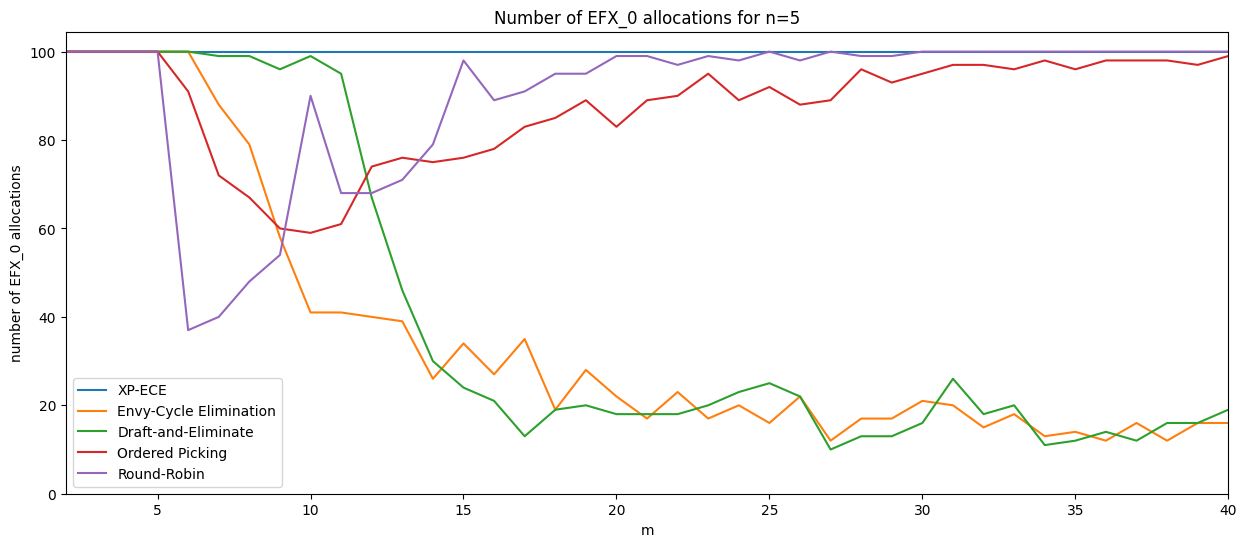

In [22]:
n = 5
ms = np.arange(2, 41, 1)

generator = AdditiveGenerator(min=0, max=10)

iterations = 100

satisfied_per_algorithm = initialize_satisfied_per_algorithm(ALGORITHMS)

for m in ms:
    print(m, end=" ")

    satisfied_per_algorithm = run_for_satisfied_numbers(n, m, generator, iterations, "EFX_0", ALGORITHMS, satisfied_per_algorithm)

draw(ms, satisfied_per_algorithm, "m", "number of EFX_0 allocations", "Number of EFX_0 allocations for n=5")

### EF1

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 

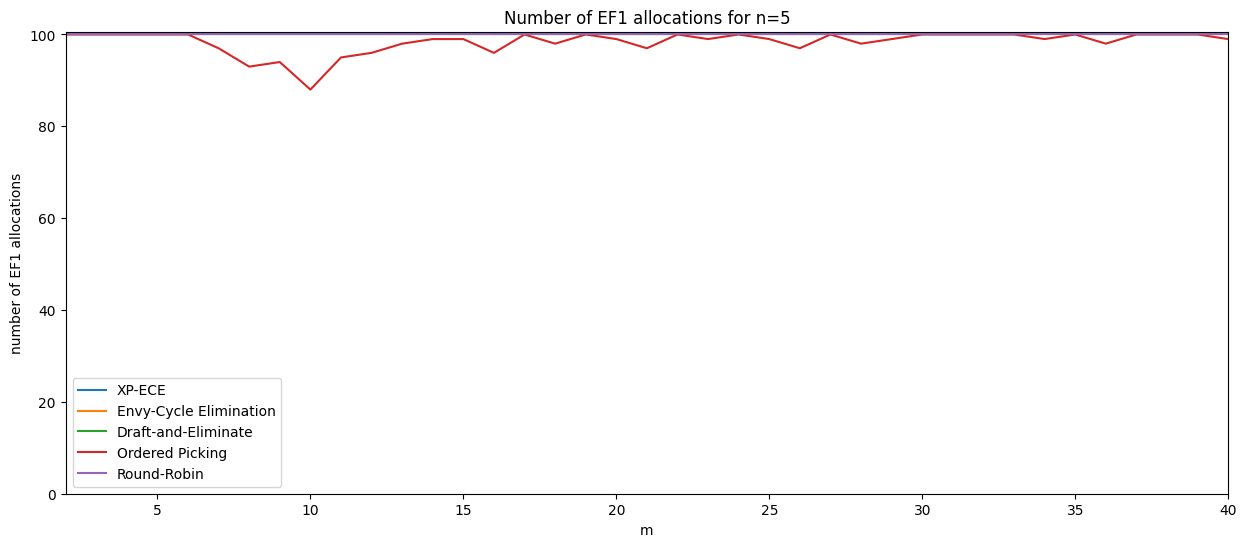

In [23]:
n = 5
ms = np.arange(2, 41, 1)

generator = AdditiveGenerator(min=0, max=10)

iterations = 100

satisfied_per_algorithm = initialize_satisfied_per_algorithm(ALGORITHMS)

for m in ms:
    print(m, end=" ")

    satisfied_per_algorithm = run_for_satisfied_numbers(n, m, generator, iterations, "EF1", ALGORITHMS, satisfied_per_algorithm)

draw(ms, satisfied_per_algorithm, "m", "number of EF1 allocations", "Number of EF1 allocations for n=5")

### PROP

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 

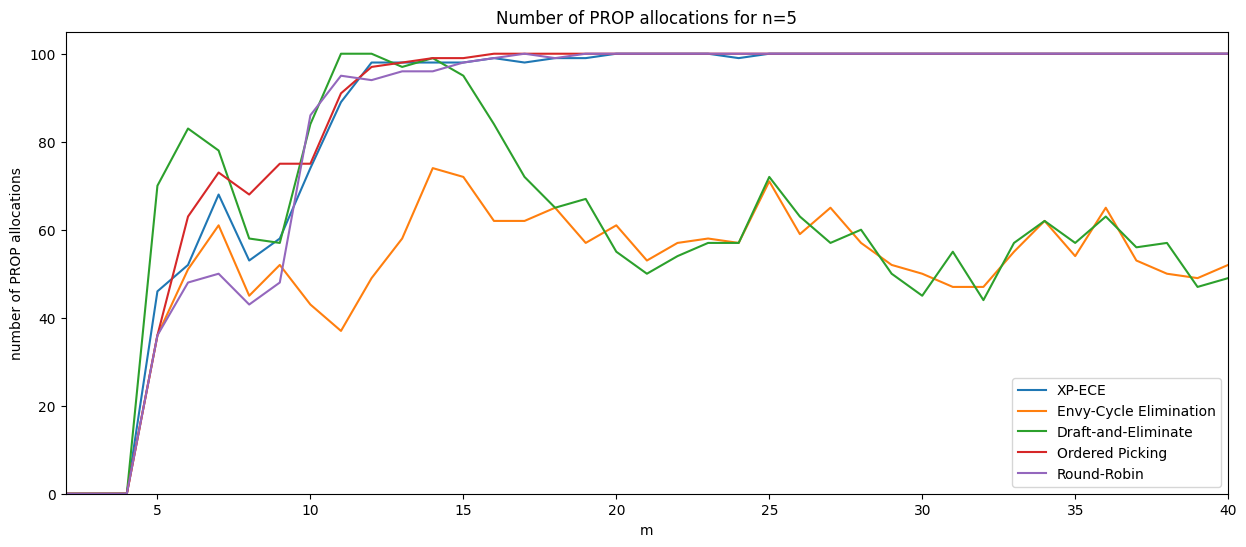

In [24]:
n = 5
ms = np.arange(2, 41, 1)

generator = AdditiveGenerator(min=0, max=10)

iterations = 100

satisfied_per_algorithm = initialize_satisfied_per_algorithm(ALGORITHMS)

for m in ms:
    print(m, end=" ")

    satisfied_per_algorithm = run_for_satisfied_numbers(n, m, generator, iterations, "PROP", ALGORITHMS, satisfied_per_algorithm)

draw(ms, satisfied_per_algorithm, "m", "number of PROP allocations", "Number of PROP allocations for n=5")

### EF

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 

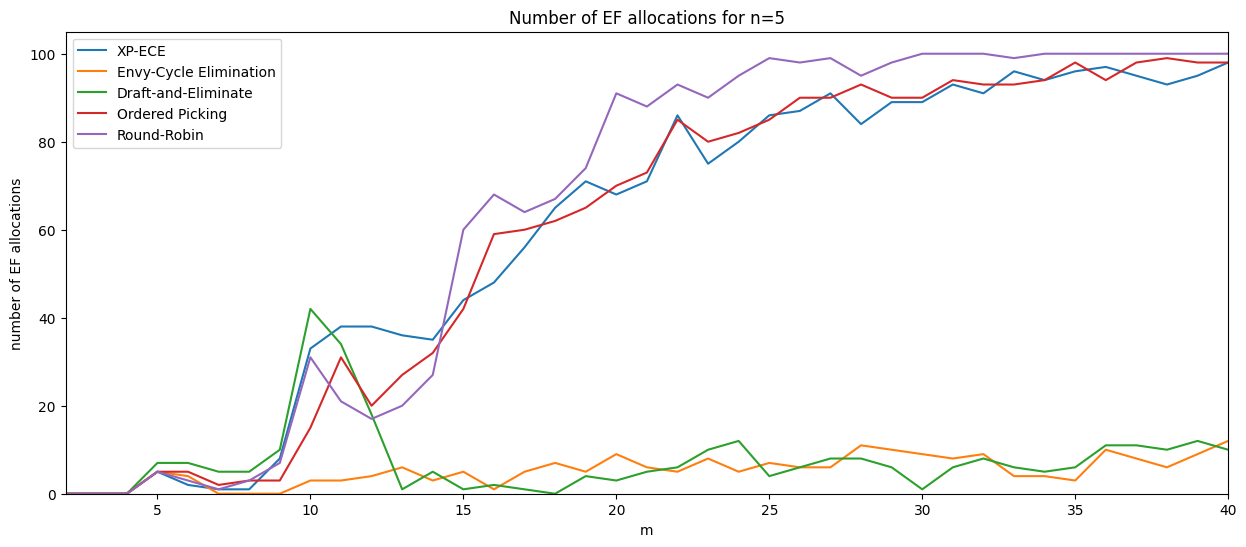

In [25]:
n = 5
ms = np.arange(2, 41, 1)

generator = AdditiveGenerator(min=0, max=10)

iterations = 100

satisfied_per_algorithm = initialize_satisfied_per_algorithm(ALGORITHMS)

for m in ms:
    print(m, end=" ")

    satisfied_per_algorithm = run_for_satisfied_numbers(n, m, generator, iterations, "EF", ALGORITHMS, satisfied_per_algorithm)

draw(ms, satisfied_per_algorithm, "m", "number of EF allocations", "Number of EF allocations for n=5")